In [31]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Audio
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import seaborn as sns

## Vizualing Audio

In [2]:
file_name = "./jazz.00000.wav"
file_name_1 = "./pop.00000.wav"

In [3]:
y, sr = librosa.load(file_name, sr=22050)
y_1, sr_1 = librosa.load(file_name_1, sr=22050)

In [4]:
y, y_1

(array([-0.00924683, -0.01177979, -0.01370239, ...,  0.0071106 ,
         0.00561523,  0.00561523], dtype=float32),
 array([-0.0887146 , -0.09524536, -0.10275269, ...,  0.04016113,
         0.03860474,  0.02639771], dtype=float32))

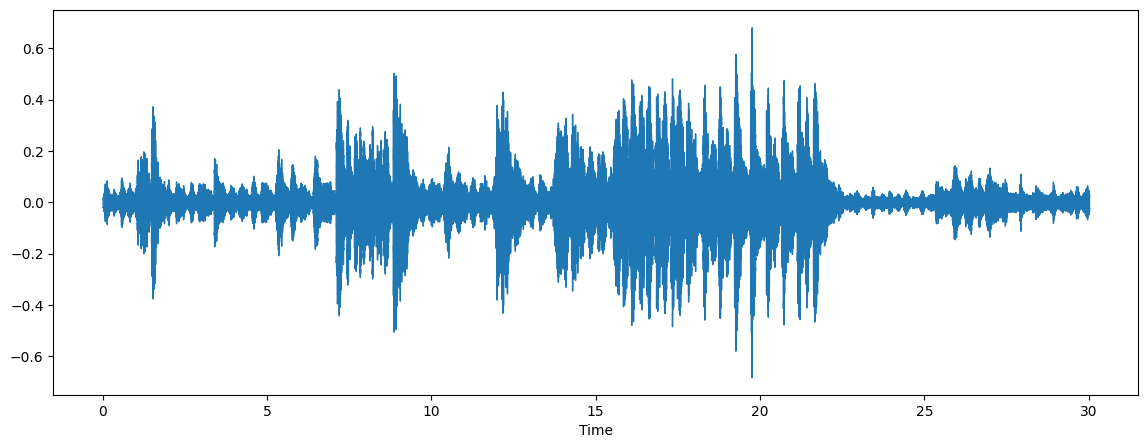

In [5]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(y, sr=sr)

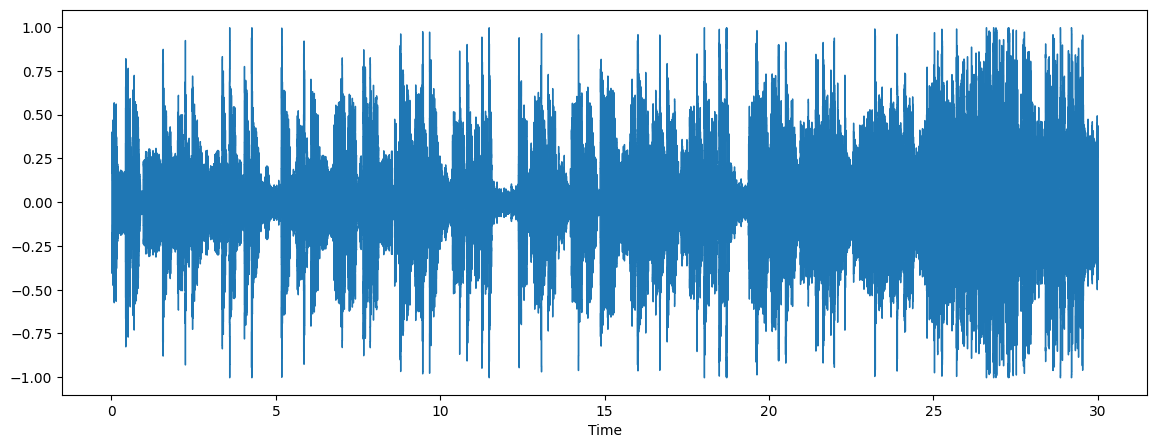

In [6]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(y_1, sr=sr_1)

In [7]:
Audio(data=y, rate=sr)

In [8]:
Audio(data=y_1, rate=sr_1)

## Doing Vizualization on Chunks of Audio

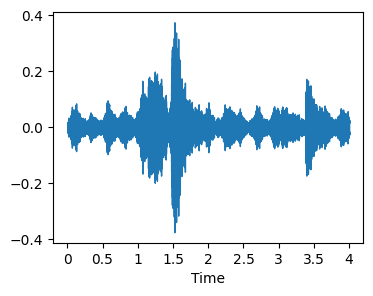

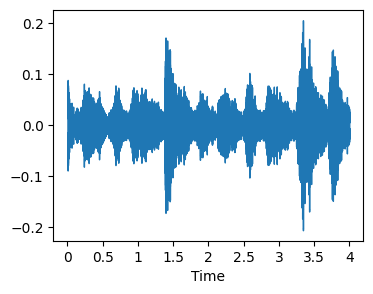

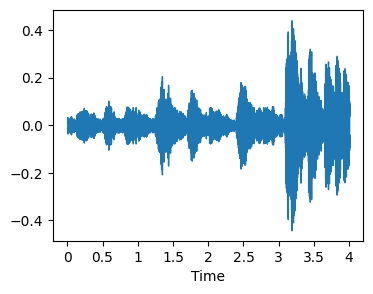

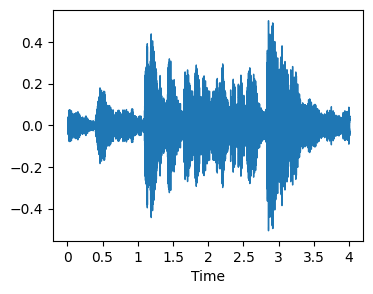

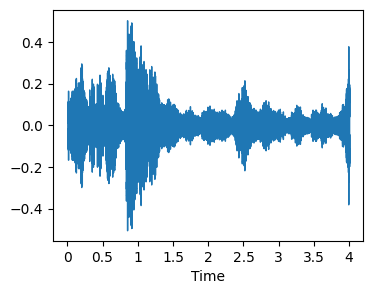

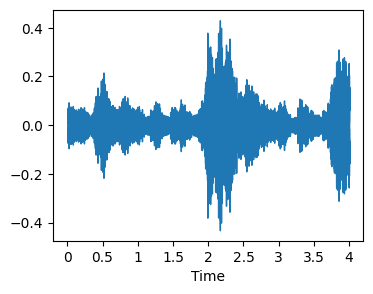

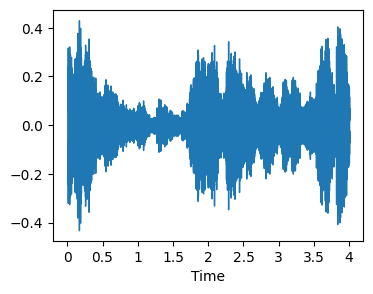

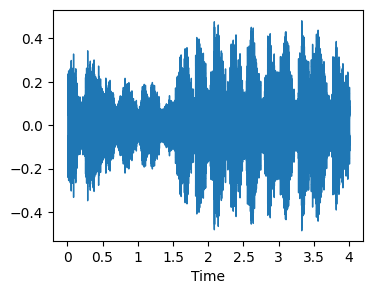

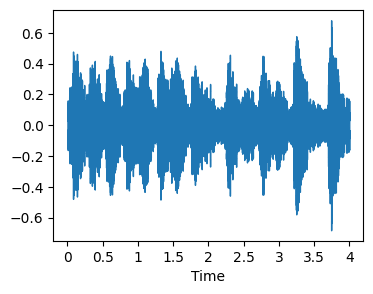

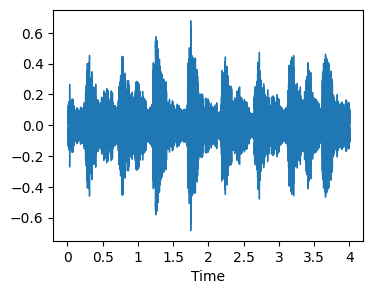

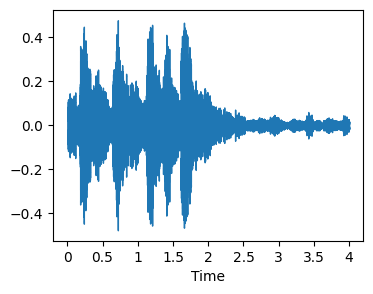

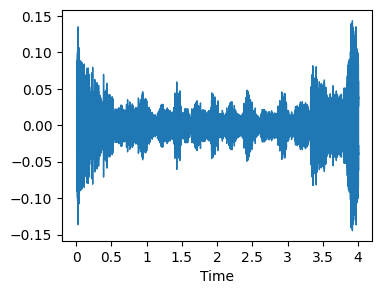

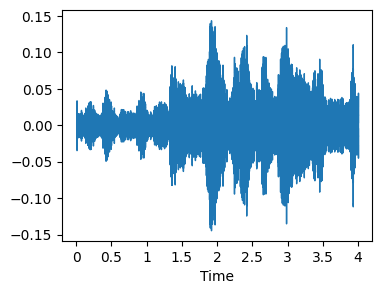

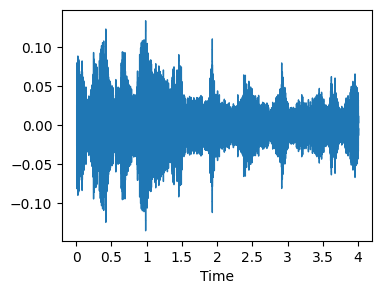

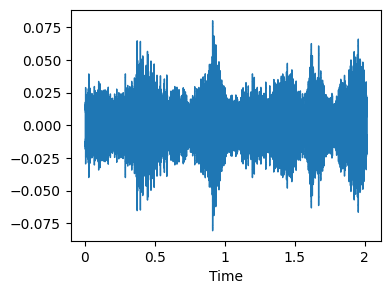

In [9]:
audio_path = "./jazz.00000.wav"
y, sr = librosa.load(file_name, sr=None) #sr=None keeps the original sr

#define the duration of each chunk and overlap
chunk_duration = 4
overlap_duration = 2

#Convert duration to sr
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

#Calculate no. of chunks
num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1

#Iterate over each chunk
for i in range(num_chunks):
    start = i*(chunk_samples-overlap_samples)
    end = start+chunk_samples

    chunk = y[start:end]
    plt.figure(figsize=(4,3))
    librosa.display.waveshow(chunk, sr=sr)

## MelSpectrogram

In [10]:
#MelSpectrogram of entire Audio

def plot_melspectrogram(y, sr):
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format="%2.f dB")

In [11]:
file_name = "./jazz.00000.wav"
y, sr = librosa.load(file_name, sr=44100)

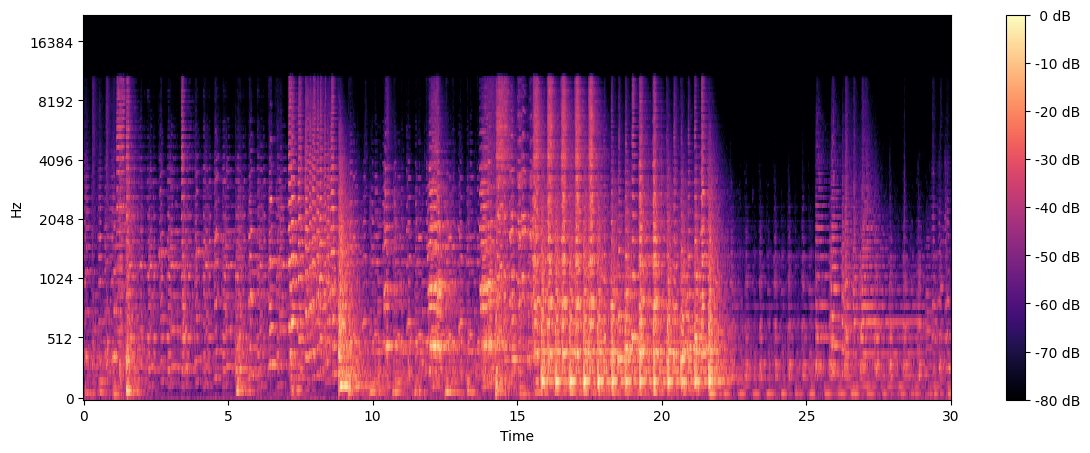

In [12]:
plot_melspectrogram(y, sr)

In [13]:
def plot_melspectogram_chunks(y, sr):
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sr
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate no. of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #Iterate over each chunk
    for i in range(num_chunks):
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
    
        chunk = y[start:end]

        # Compute the Mel spectrogram for the chunk
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(mel_spectrogram.shape)
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Visualize the spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()

In [14]:
file_name = "./jazz.00000.wav"
y, sr = librosa.load(file_name, sr=44100)

(128, 345)


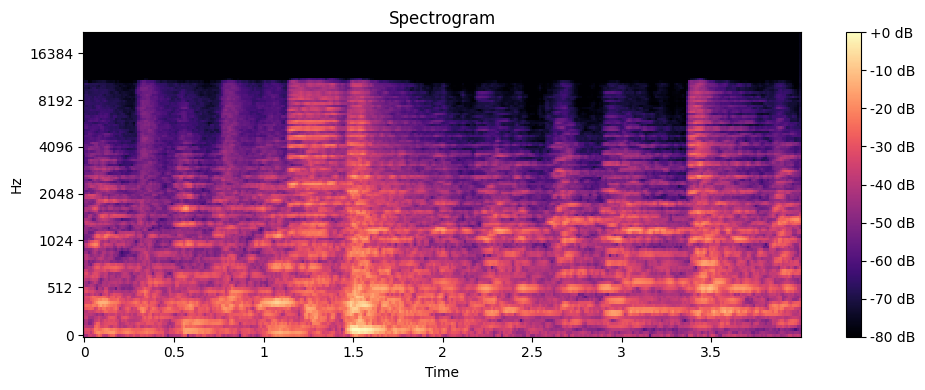

(128, 345)


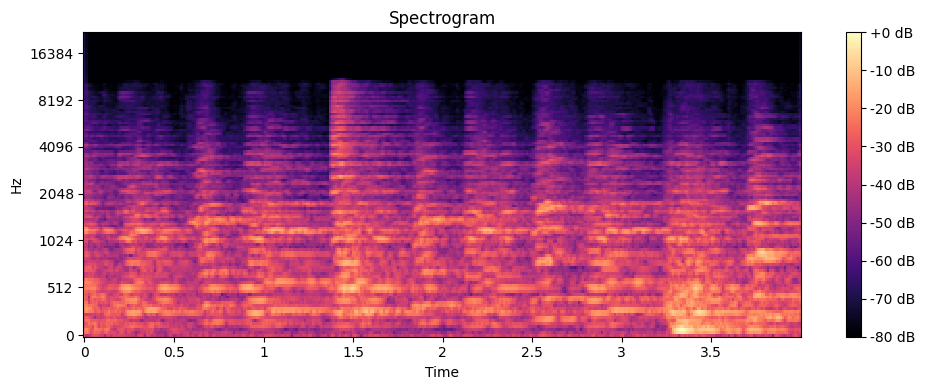

(128, 345)


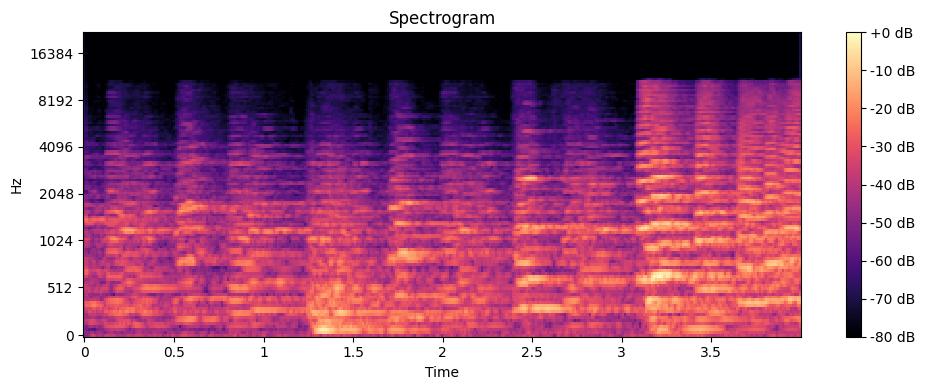

(128, 345)


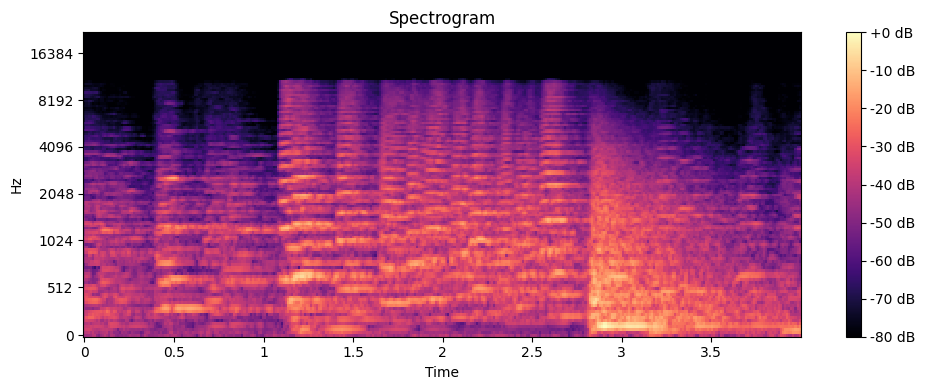

(128, 345)


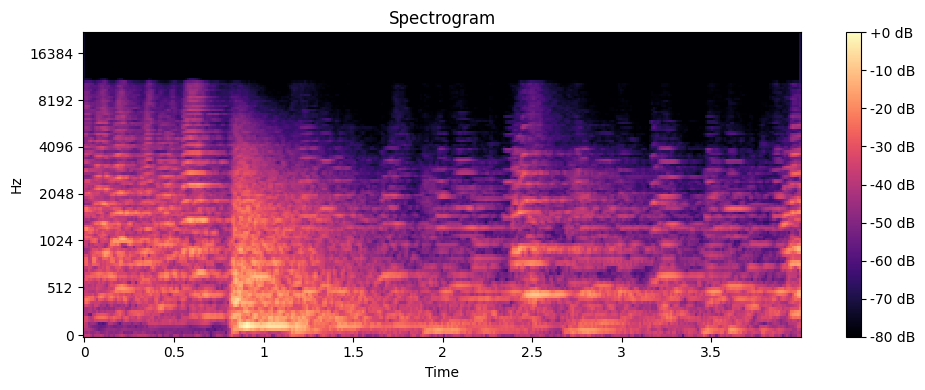

(128, 345)


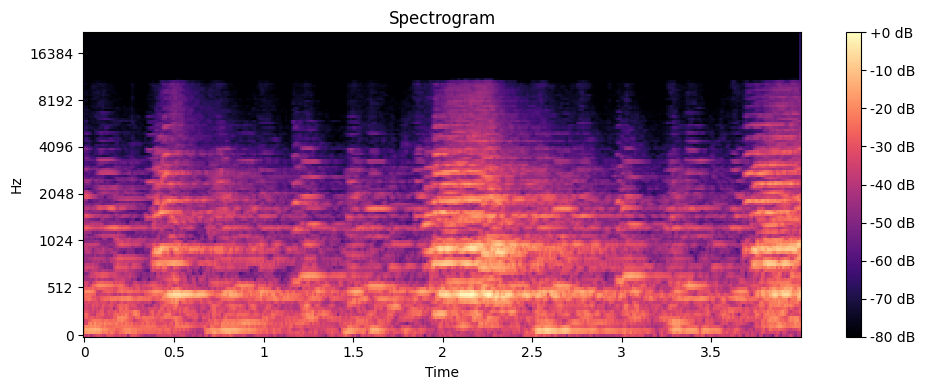

(128, 345)


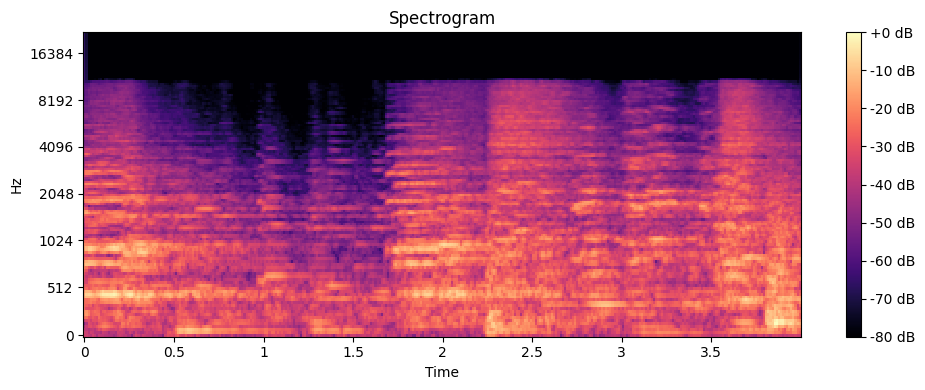

(128, 345)


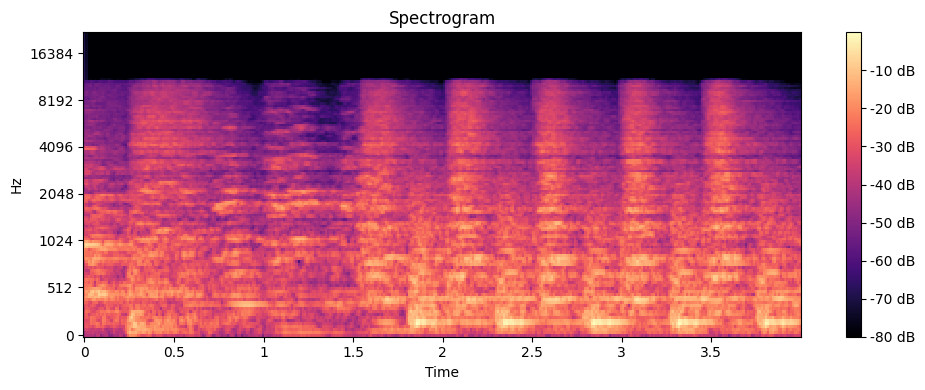

(128, 345)


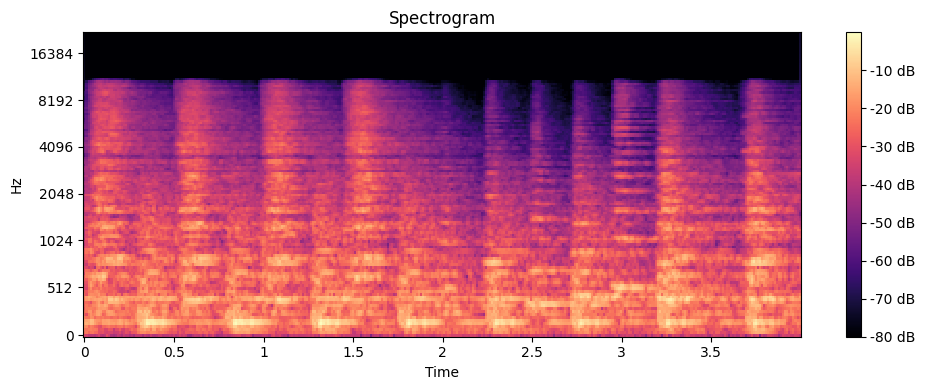

(128, 345)


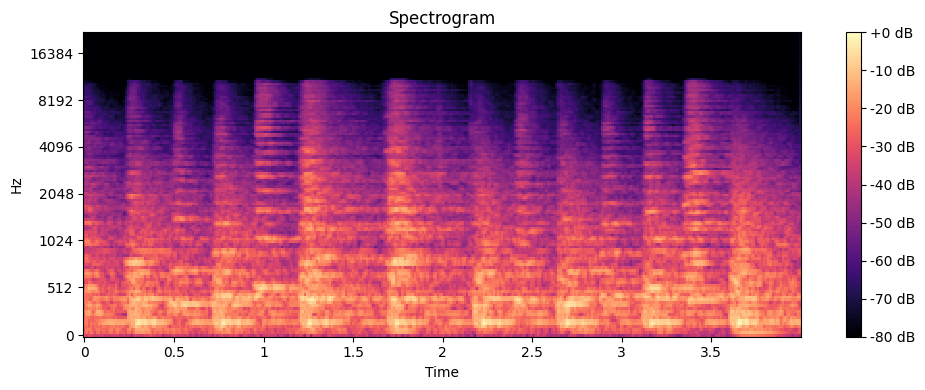

(128, 345)


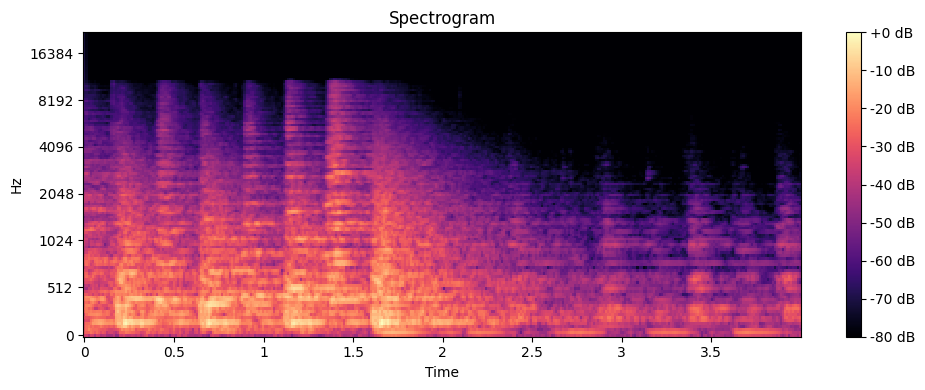

(128, 345)


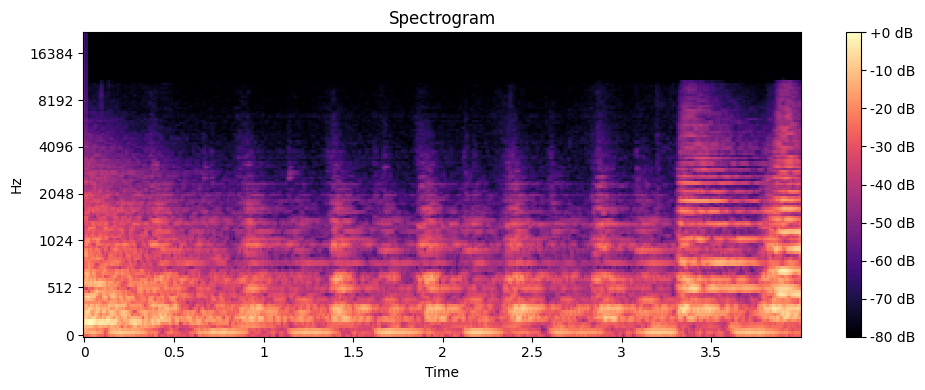

(128, 345)


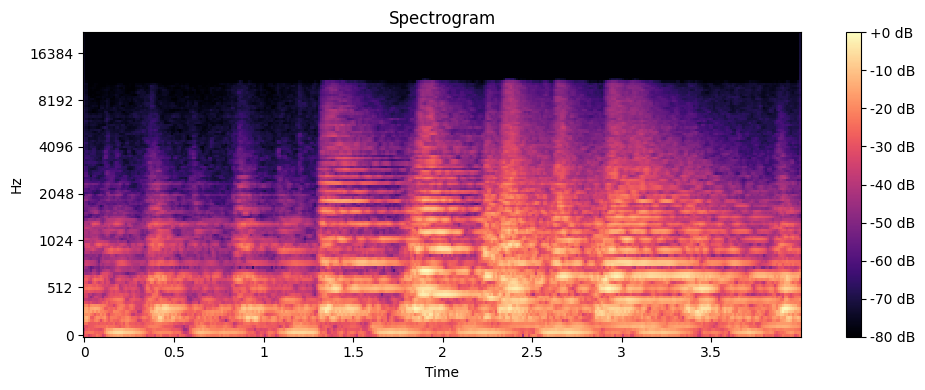

(128, 345)


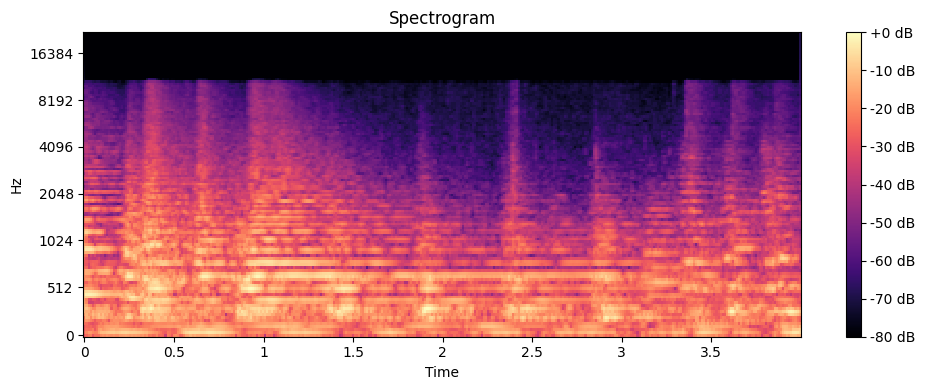

(128, 174)


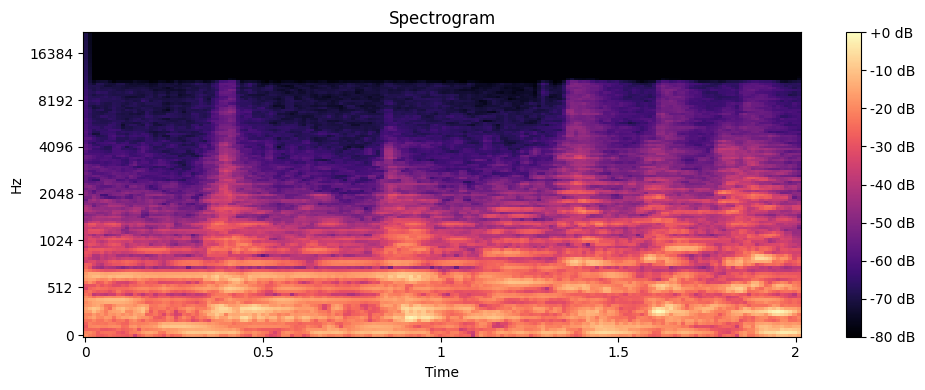

In [15]:
plot_melspectogram_chunks(y, sr)

## Data Preprocessing

In [7]:
data_dir = "./genres_original"
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [8]:
def load_and_preprocess_data(data_dir, classes, target_shape=(210, 210)):
    data = []
    labels = []
    
    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--", class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                
                # Load audio file
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                
                # Chunk settings
                chunk_duration = 4  # seconds
                overlap_duration = 2  # seconds
                
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                
                for i in range(num_chunks):
                    # Start and end indices for chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    
                    # Make sure the chunk does not go beyond the audio length
                    chunk = audio_data[start:end]
                    
                    if len(chunk) < chunk_samples:
                        # Pad the last chunk if it's shorter than chunk_samples
                        chunk = np.pad(chunk, (0, chunk_samples - len(chunk)))
                    
                    # Compute the Mel spectrogram for the chunk
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                    
                    # Resize the Mel spectrogram to the target shape
                    mel_spectrogram_resized = tf.image.resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                    
                    data.append(mel_spectrogram_resized)
                    labels.append(i_class)
    
    return np.array(data), np.array(labels)

In [9]:
data, labels = load_and_preprocess_data(data_dir, classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [11]:
data.shape

(14975, 210, 210, 1)

In [12]:
labels.shape

(14975,)

In [13]:
labels = tf.keras.utils.to_categorical(labels, num_classes=len(classes))
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## Building Model

In [23]:
model = models.Sequential()
model.add(layers.InputLayer(shape=X_train[0].shape))
model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

In [24]:
model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

In [25]:
model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

In [26]:
model.add(layers.Dropout(0.3))

In [27]:
model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

In [28]:
model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

In [29]:
model.add(layers.Dropout(0.3))

In [30]:
model.add(layers.Flatten())

In [31]:
model.add(layers.Dense(units=1200, activation='relu'))

In [32]:
model.add(layers.Dropout(0.45))

In [33]:
model.add(layers.Dense(units=len(classes), activation='softmax'))

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 210, 210, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 208, 208, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 104, 104, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 104, 104, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 102, 102, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 51, 51, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       9,831,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,555,258 (55.52 MB)

 Trainable params: 14,555,258 (55.52 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1459s 4s/step - accuracy: 0.2419 - loss: 2.1215 - val_accuracy: 0.4614 - val_loss: 1.4668
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.4946 - loss: 1.4299 - val_accuracy: 0.5783 - val_loss: 1.1919
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1041s 3s/step - accuracy: 0.5992 - loss: 1.1374 - val_accuracy: 0.6581 - val_loss: 0.9993
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 948s 3s/step - accuracy: 0.6688 - loss: 0.9482 - val_accuracy: 0.6925 - val_loss: 0.9037
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 805s 2s/step - accuracy: 0.7188 - loss: 0.7983 - val_accuracy: 0.7149 - val_loss: 0.8340
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 846s 2s/step - accuracy: 0.7590 - loss: 0.7002 - val_accuracy: 0.7629 - val_loss: 0.6724
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 868s 2s/step - accuracy: 0.7930 - loss: 0.6177 - val_accuracy: 0.7730 - val_loss: 0.7007
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 859s 2s/step - accuracy: 0.8151 - loss: 0.5238 - val_ac

In [39]:
# model.save('Trained_Model.h5')
model.save('Trained_Model.keras')

In [16]:
history.history

NameError: name 'history' is not defined

In [19]:
import json
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)

NameError: name 'history' is not defined

In [21]:
import json
with open('training_history.json', 'r') as json_file:
    training_history_data = json.load(json_file)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [18]:
model = tf.keras.models.load_model('Trained_Model.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 210, 210, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 208, 208, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 104, 104, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 104, 104, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 102, 102, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 51, 51, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       9,831,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 29,110,518 (111.05 MB)

 Trainable params: 14,555,258 (55.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,555,260 (55.52 MB)

## Model Evaluation

In [45]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 197s 526ms/step - accuracy: 0.9797 - loss: 0.0599


In [46]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 52s 552ms/step - accuracy: 0.8749 - loss: 0.4768


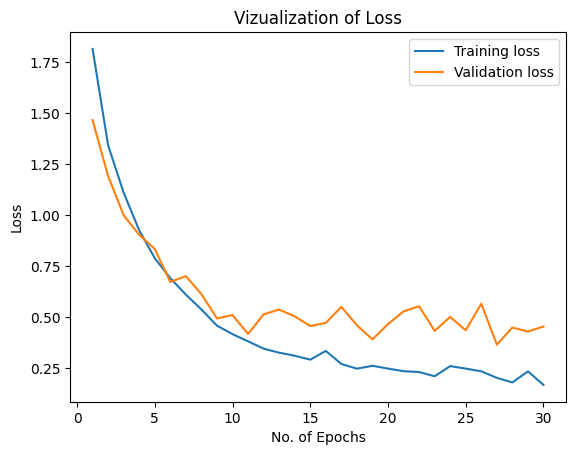

In [56]:
epochs = [i for i in range(1, 31)]
plt.plot(epochs, training_history_data['loss'], label='Training loss')
plt.plot(epochs, training_history_data['val_loss'], label='Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Vizualization of Loss')
plt.legend()

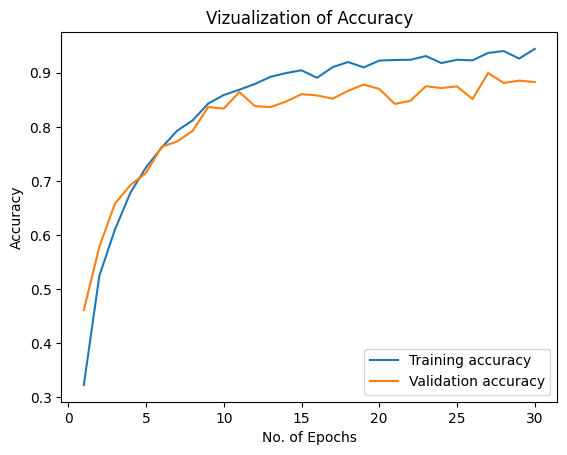

In [57]:
epochs = [i for i in range(1, 31)]
plt.plot(epochs, training_history_data['accuracy'], label='Training accuracy')
plt.plot(epochs, training_history_data['val_accuracy'], label='Validation accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Vizualization of Accuracy')
plt.legend()

In [22]:
y_pred = model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step


array([[5.6406420e-01, 6.2443592e-05, 4.6012356e-04, ..., 4.2696258e-01,
        1.2272646e-04, 6.2187929e-03],
       [3.0771530e-09, 1.3208506e-15, 5.6434653e-12, ..., 1.2127161e-08,
        1.3585923e-12, 4.5845737e-03],
       [5.8322650e-13, 2.2822546e-16, 2.0401449e-13, ..., 1.7538018e-06,
        3.7852534e-12, 8.5489452e-03],
       ...,
       [9.9999797e-01, 6.1068256e-17, 8.4018176e-08, ..., 2.2962686e-15,
        5.2674417e-11, 1.9613451e-06],
       [8.5648126e-04, 9.8659128e-01, 4.7178299e-04, ..., 2.6261003e-05,
        6.1690836e-04, 5.7388908e-05],
       [1.3979486e-10, 1.6557743e-12, 8.2174922e-10, ..., 1.0533630e-03,
        1.0160672e-03, 2.3288294e-04]], dtype=float32)

In [23]:
y_pred.shape

(2995, 10)

In [24]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([0, 6, 6, ..., 0, 1, 4], dtype=int64)

In [26]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
true_categories = np.argmax(y_test, axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.94      0.86      0.90       302
   classical       0.89      0.98      0.94       298
     country       0.86      0.71      0.78       317
       disco       0.95      0.91      0.93       312
      hiphop       0.94      0.92      0.93       277
        jazz       0.86      0.92      0.89       311
       metal       0.93      0.92      0.93       302
         pop       0.95      0.82      0.88       289
      reggae       0.90      0.91      0.91       296
        rock       0.68      0.89      0.77       291

    accuracy                           0.88      2995
   macro avg       0.89      0.88      0.88      2995
weighted avg       0.89      0.88      0.88      2995



In [29]:
cm

array([[260,   0,  14,   0,   0,  13,   2,   1,   0,  12],
       [  0, 293,   0,   0,   0,   4,   0,   0,   1,   0],
       [  7,   3, 224,   5,   1,  22,   2,   0,   4,  49],
       [  0,   2,   0, 283,   1,   0,   5,   1,   8,  12],
       [  1,   1,   0,   0, 254,   1,   3,   8,   5,   4],
       [  2,  14,   5,   0,   0, 286,   0,   0,   1,   3],
       [  0,   0,   0,   0,   1,   1, 279,   0,   1,  20],
       [  4,   8,   4,   7,   8,   0,   2, 238,   5,  13],
       [  2,   1,   6,   2,   5,   2,   0,   2, 269,   7],
       [  2,   6,   7,   1,   0,   5,   7,   1,   4, 258]], dtype=int64)

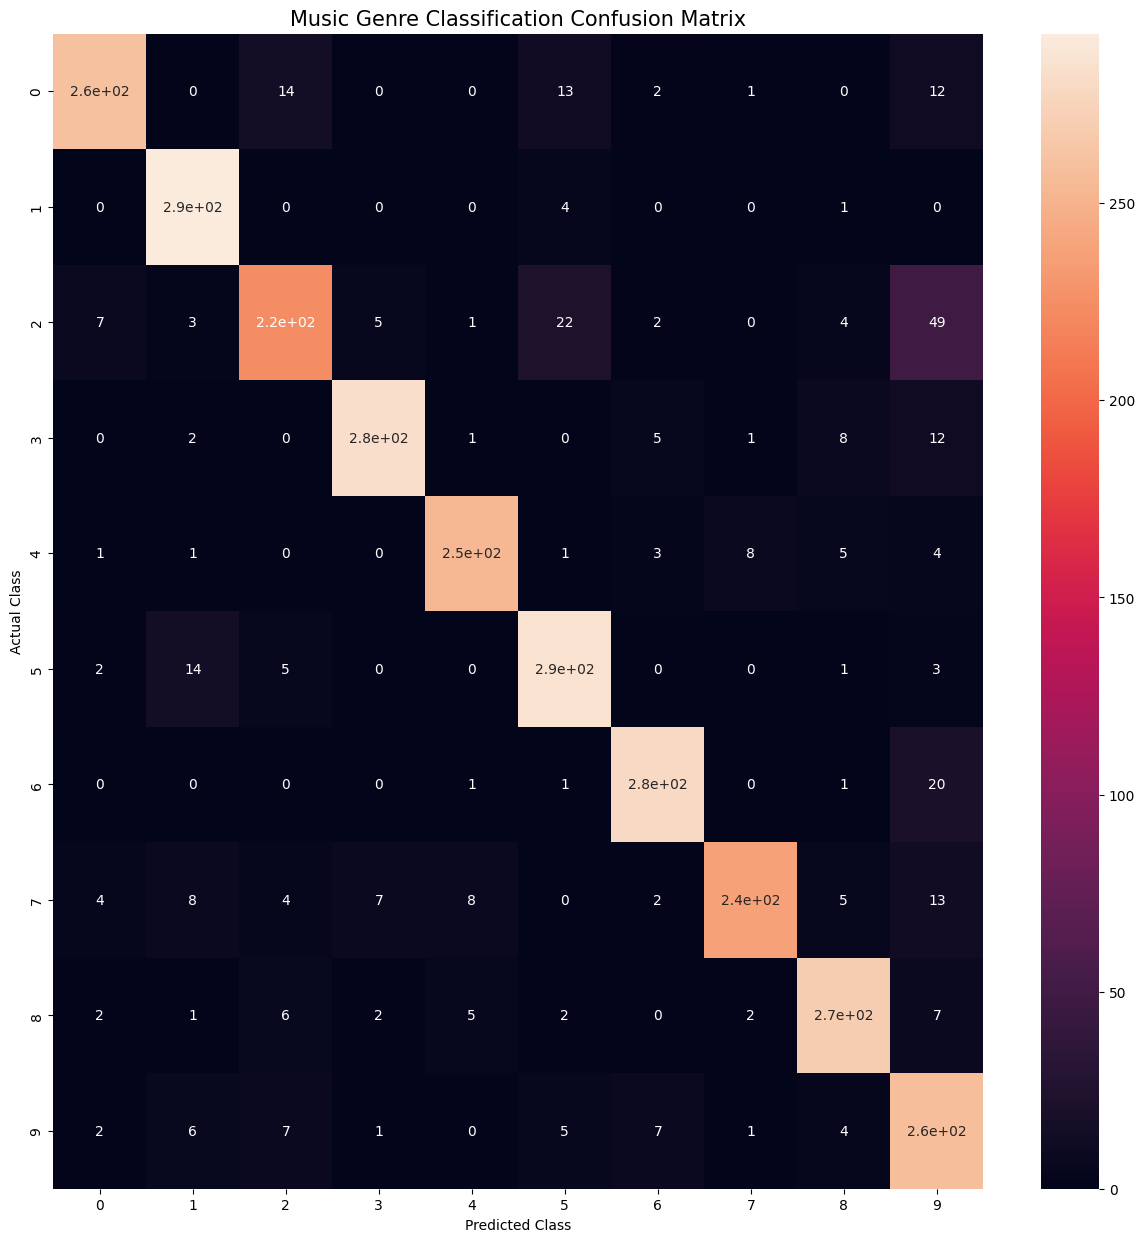

In [32]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Music Genre Classification Confusion Matrix',fontsize = 15)
plt.show()